In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linucb import *
import os
from tqdm.auto import tqdm
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [2]:
print(os.listdir("./datasets"))

dfs = []
for fname in os.listdir("./datasets"):
    print(fname)
    df = pd.read_csv(f"./datasets/{fname}", engine='python', low_memory=True)
    dfs.append(df)

['users.csv', 'movies.csv', 'ratings.csv']
users.csv
movies.csv
ratings.csv


In [3]:
users, movies, ratings = dfs
display(users.head())
print(f"="*35)
display(movies.head())
print(f"="*35)
display(ratings.head())

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,movieid,title,genre
0,1,Toy Story (1995),"Animation, Children's, Comedy"
1,2,Jumanji (1995),"Adventure, Children's, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
3,4,Waiting to Exhale (1995),"Comedy, Drama"
4,5,Father of the Bride Part II (1995),Comedy


,userid,movieid,ratings,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


# Preprocess

## Users

In [4]:
## gender one-hot
users['gender'] = users['gender'].map(lambda x: 1 if x == "F" else 0)
users.head()

,userid,gender,age,occupation,zipcode
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455


In [5]:
## age one-hot
bins = [0, 20, 30, 40, 50, 60, np.inf]
names = ['<20', '20-29', '30-39','40-49', '51-60', '60+']
labels = [i for i in range(len(names))]

name_label = dict()
for name, label in zip(names, labels):
    name_label[name] = label

print(name_label)
users['agegroup'] = pd.cut(users['age'], bins=bins, labels=names)
users['agegroup'] = users['agegroup'].map(name_label)
users.head()

{'<20': 0, '20-29': 1, '30-39': 2, '40-49': 3, '51-60': 4, '60+': 5}


,userid,gender,age,occupation,zipcode,agegroup
0,1,1,1,10,48067,0
1,2,0,56,16,70072,4
2,3,0,25,15,55117,1
3,4,0,45,7,02460,3
4,5,0,25,20,55455,1


In [6]:
users.drop('age', axis=1, inplace=True)

age_onehot = np.zeros(shape=(users.shape[0], users['agegroup'].nunique()), dtype=np.uint8)
for i in range(users.shape[0]):
    group_idx = users['agegroup'].iloc[i]
    age_onehot[i][group_idx] = 1

for j in range(users['agegroup'].nunique()):
    users[f"agegroup_{j}"] = age_onehot[:, j]

users.drop('agegroup', axis=1, inplace=True)
users.head()

,userid,gender,occupation,zipcode,agegroup_0,agegroup_1,agegroup_2,agegroup_3,agegroup_4
0,1,1,10,48067,1,0,0,0,0
1,2,0,16,70072,0,0,0,0,1
2,3,0,15,55117,0,1,0,0,0
3,4,0,7,02460,0,0,0,1,0
4,5,0,20,55455,0,1,0,0,0


In [7]:
## occupation one-hot
occupation_onehot = np.zeros(shape=(users.shape[0], users['occupation'].nunique()), dtype=np.uint8)
for i in range(users.shape[0]):
    group_idx = users['occupation'].iloc[i]
    occupation_onehot[i][group_idx] = 1

for j in range(users['occupation'].nunique()):
    users[f"occupation_{j}"] = occupation_onehot[:, j]

users.drop('occupation', axis=1, inplace=True)
users.head()

,userid,gender,zipcode,agegroup_0,agegroup_1,agegroup_2,agegroup_3,agegroup_4,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,1,1,48067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,70072,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,55117,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,0,02460,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,55455,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
## drop zipcode
users.drop('zipcode', axis=1, inplace=True)
users.head()

,userid,gender,agegroup_0,agegroup_1,agegroup_2,agegroup_3,agegroup_4,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Movies

In [9]:
## drop title
movies.drop('title', axis=1, inplace=True)

In [10]:
genres = []
for i in range(movies.shape[0]):
    genre_string = movies['genre'].iloc[i]
    genre_split = genre_string.split(', ')
    for g in genre_split:
        if g not in genres:
            genres.append(g)
genres = sorted(genres)
print(genres)

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [11]:
## genre one-hot
genre_onehot = np.zeros(shape=(movies.shape[0], len(genres)), dtype=np.uint8)
for i in range(movies.shape[0]):
    g_split = movies['genre'].iloc[i].split(', ')
    for g in g_split:
        idx = genres.index(g)
        genre_onehot[i, idx] = 1

for j in range(len(genres)):
    genre_name = genres[j]
    movies[f"is_{genre_name}"] = genre_onehot[:, j]

movies.drop('genre', axis=1, inplace=True)
movies.head()

,movieid,is_Action,is_Adventure,is_Animation,is_Children's,is_Comedy,is_Crime,is_Documentary,is_Drama,is_Fantasy,is_Film-Noir,is_Horror,is_Musical,is_Mystery,is_Romance,is_Sci-Fi,is_Thriller,is_War,is_Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Ratings

In [12]:
ratings.drop('timestamp', axis=1, inplace=True)
ratings['reward'] = ratings['ratings'].map(lambda x: 1 if x > 4 else 0)
ratings.drop(['ratings'], axis=1, inplace=True)

In [13]:
# user_mean = ratings[['userid', 'ratings']].groupby(by='userid').mean()
# user_mean.reset_index(drop=False, inplace=True)
# user_mean.head()

In [14]:
# ratings = pd.merge(left=ratings, right=user_mean, on='userid', how='left')
# ratings.head()

In [15]:
# ratings['reward'] = (ratings['ratings_x'] > ratings['ratings_y']).astype(np.uint8)
# ratings.drop(['ratings_x', 'ratings_y'], axis=1, inplace=True)
# print(ratings.shape)
ratings.head()

,userid,movieid,reward
0,1,1193,1
1,1,661,0
2,1,914,0
3,1,3408,0
4,1,2355,1


In [16]:
n = 20

top_movies = ratings[["movieid", "userid"]].groupby(by="movieid").count().sort_values(by=["userid"], ascending=False)
top_movies.reset_index(drop=False, inplace=True)
top_movies.head()
top_n_movies = movies[movies['movieid'].isin(top_movies.head(n)['movieid'])]
top_n_movies.sort_values(by='movieid', inplace=True)
top_n_movies.reset_index(drop=True, inplace=True)
top_n_movies.head()

,movieid,is_Action,is_Adventure,is_Animation,is_Children's,is_Comedy,is_Crime,is_Documentary,is_Drama,is_Fantasy,is_Film-Noir,is_Horror,is_Musical,is_Mystery,is_Romance,is_Sci-Fi,is_Thriller,is_War,is_Western
0,110,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,260,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,480,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,589,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [17]:
top_n_ratings = ratings[ratings['movieid'].isin(top_n_movies['movieid'])]
top_n_ratings.reset_index(drop=True, inplace=True)
print(top_n_ratings.shape)
top_n_ratings.head()

(52041, 3)


,userid,movieid,reward
0,1,1197,0
1,1,1270,1
2,1,527,1
3,1,2762,0
4,1,260,0


# LinUCB Simulation

In [18]:
def run(learner, data, arms, users, nsim):
    arm_features = arms.shape[1]
    user_features = users.shape[1] - 1
    d = arm_features + user_features
    
    aligned_ctr = []
    aligned_timestep = 0
    cum_reward = 0
    
    arm_list = arms['movieid']
    for sim in range(nsim):
        if sim == 0:
            data = data.copy()
            unused = []
        else:
            data = data.iloc[unused].copy()
            unused = []
        cnt = data.shape[0]
        for i in tqdm(range(data.shape[0])):
            user_id = data['userid'].iloc[i]
            movie_id = data['movieid'].iloc[i]
            user_feature = users[users['userid'] == user_id].iloc[:, 1:].to_numpy()
            chosen_arm = learner.choose(user_feature)
            if arm_list[chosen_arm] == movie_id:
                reward = data['reward'].iloc[i]
                aligned_timestep += 1
                cum_reward += reward
                aligned_ctr.append((cum_reward / aligned_timestep))
                learner.update(user_feature, chosen_arm, reward)
            else:
                unused.append(i)
        print(f"Hit count: {cnt - len(unused)}")
    
    return {
        "aligned_ctr": aligned_ctr,
        "aligned_timestamp": aligned_timestep,
        "cum_reward": cum_reward,
    }

In [19]:
arm_to_use = top_n_movies.iloc[:, 1:].to_numpy()
arm_features = movies.shape[1] - 1
user_features = users.shape[1] - 1
d = arm_features + user_features
k = arm_features * user_features
alphas = [0., 0.5, 1., 2.]
reward_mean = top_n_ratings["reward"].mean()
print(f"Mean reward: {reward_mean}")

Mean reward: 0.4631156203762418


In [20]:
FIGSIZE = (6, 5)
NSIM = 3

alpha=0.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2989


  0%|          | 0/49052 [00:00<?, ?it/s]

Hit count: 2


  0%|          | 0/49050 [00:00<?, ?it/s]

Hit count: 0
alpha=0.5


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2839


  0%|          | 0/49202 [00:00<?, ?it/s]

Hit count: 1805


  0%|          | 0/47397 [00:00<?, ?it/s]

Hit count: 680
alpha=1.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3049


  0%|          | 0/48992 [00:00<?, ?it/s]

Hit count: 2354


  0%|          | 0/46638 [00:00<?, ?it/s]

Hit count: 1551
alpha=2.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3384


  0%|          | 0/48657 [00:00<?, ?it/s]

Hit count: 2668


  0%|          | 0/45989 [00:00<?, ?it/s]

Hit count: 1904


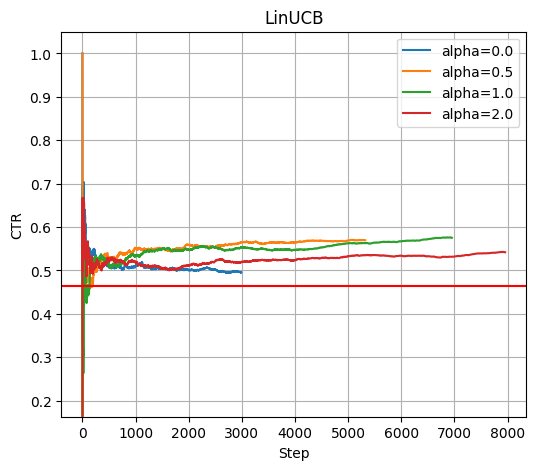

In [21]:
plt.figure(figsize=FIGSIZE)

for i, alpha in enumerate(alphas):
    print(f"alpha={alpha}")
    learner = LinUCB(arms=arm_to_use, d=d, alpha=alpha)
    result = run(
        learner=learner, 
        data=top_n_ratings, 
        arms=top_n_movies,
        users=users,
        nsim=NSIM
    )

    plt.plot(result['aligned_ctr'], label=f"alpha={alpha}")
plt.axhline(y=reward_mean, color="red")
plt.ylim([reward_mean-0.3, 1.05])
plt.title(f"{learner.__class__.__name__}")
plt.grid(True)
plt.legend()
plt.xlabel('Step')
plt.ylabel('CTR')
plt.show()

alpha=0.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2865


  0%|          | 0/49176 [00:00<?, ?it/s]

Hit count: 2141


  0%|          | 0/47035 [00:00<?, ?it/s]

Hit count: 1615
alpha=0.5


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2843


  0%|          | 0/49198 [00:00<?, ?it/s]

Hit count: 2354


  0%|          | 0/46844 [00:00<?, ?it/s]

Hit count: 1860
alpha=1.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2917


  0%|          | 0/49124 [00:00<?, ?it/s]

Hit count: 2431


  0%|          | 0/46693 [00:00<?, ?it/s]

Hit count: 2073
alpha=2.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2824


  0%|          | 0/49217 [00:00<?, ?it/s]

Hit count: 2584


  0%|          | 0/46633 [00:00<?, ?it/s]

Hit count: 2252


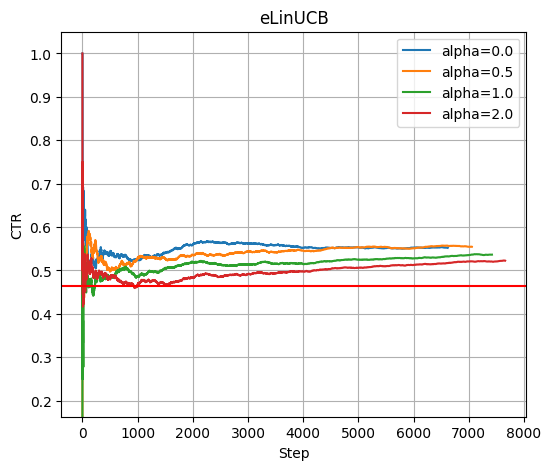

In [22]:
plt.figure(figsize=FIGSIZE)

for i, alpha in enumerate(alphas):
    print(f"alpha={alpha}")
    learner = eLinUCB(arms=arm_to_use, d=d, alpha=alpha, epsilon=0.3)
    result = run(
        learner=learner, 
        data=top_n_ratings, 
        arms=top_n_movies,
        users=users,
        nsim=NSIM
    )

    plt.plot(result['aligned_ctr'], label=f"alpha={alpha}")
plt.axhline(y=reward_mean, color="red")
plt.ylim([reward_mean-0.3, 1.05])
plt.title(f"{learner.__class__.__name__}")
plt.grid(True)
plt.legend()
plt.xlabel('Step')
plt.ylabel('CTR')
plt.show()

alpha=0.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3282


  0%|          | 0/48759 [00:00<?, ?it/s]

Hit count: 378


  0%|          | 0/48381 [00:00<?, ?it/s]

Hit count: 55
alpha=0.5


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3009


  0%|          | 0/49032 [00:00<?, ?it/s]

Hit count: 1954


  0%|          | 0/47078 [00:00<?, ?it/s]

Hit count: 623
alpha=1.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3158


  0%|          | 0/48883 [00:00<?, ?it/s]

Hit count: 2257


  0%|          | 0/46626 [00:00<?, ?it/s]

Hit count: 1240
alpha=2.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 3320


  0%|          | 0/48721 [00:00<?, ?it/s]

Hit count: 2675


  0%|          | 0/46046 [00:00<?, ?it/s]

Hit count: 2032


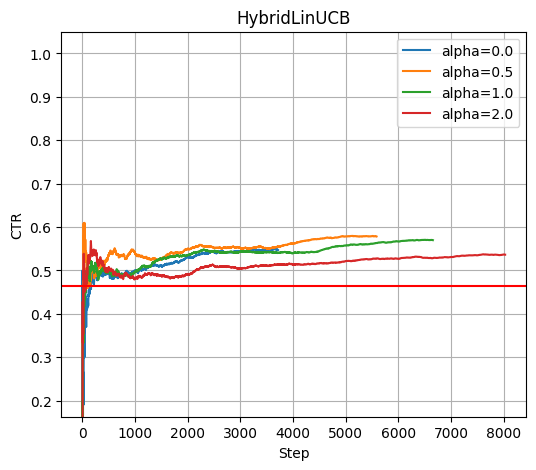

In [23]:
plt.figure(figsize=FIGSIZE)

for i, alpha in enumerate(alphas):
    print(f"alpha={alpha}")
    learner = HybridLinUCB(arms=arm_to_use, d=d, k=k, alpha=alpha)
    result = run(
        learner=learner,
        data=top_n_ratings, 
        arms=top_n_movies,
        users=users,
        nsim=NSIM
    )

    plt.plot(result['aligned_ctr'], label=f"alpha={alpha}")
plt.axhline(y=reward_mean, color="red")
plt.ylim([reward_mean-0.3, 1.05])
plt.title(f"{learner.__class__.__name__}")
plt.grid(True)
plt.legend()
plt.xlabel('Step')
plt.ylabel('CTR')
plt.show()

alpha=0.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2757


  0%|          | 0/49284 [00:00<?, ?it/s]

Hit count: 411


  0%|          | 0/48873 [00:00<?, ?it/s]

Hit count: 11
alpha=0.5


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2642


  0%|          | 0/49399 [00:00<?, ?it/s]

Hit count: 2545


  0%|          | 0/46854 [00:00<?, ?it/s]

Hit count: 2001
alpha=1.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2613


  0%|          | 0/49428 [00:00<?, ?it/s]

Hit count: 2517


  0%|          | 0/46911 [00:00<?, ?it/s]

Hit count: 2273
alpha=2.0


  0%|          | 0/52041 [00:00<?, ?it/s]

Hit count: 2627


  0%|          | 0/49414 [00:00<?, ?it/s]

Hit count: 2386


  0%|          | 0/47028 [00:00<?, ?it/s]

Hit count: 2314


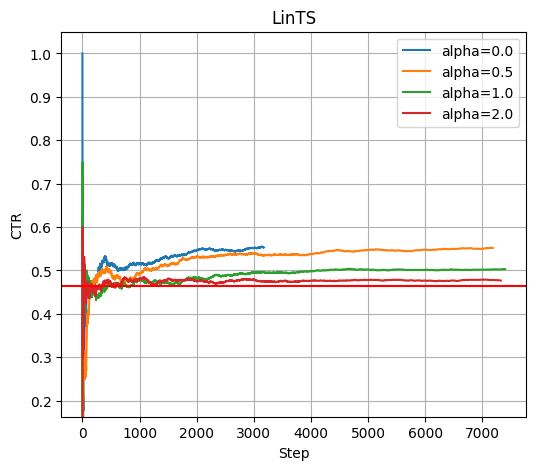

In [24]:
plt.figure(figsize=FIGSIZE)

for i, alpha in enumerate(alphas):
    print(f"alpha={alpha}")
    learner = LinTS(arms=arm_to_use, d=d, alpha=alpha)
    result = run(
        learner=learner,
        data=top_n_ratings, 
        arms=top_n_movies,
        users=users,
        nsim=NSIM
    )

    plt.plot(result['aligned_ctr'], label=f"alpha={alpha}")
plt.axhline(y=reward_mean, color="red")
plt.ylim([reward_mean-0.3, 1.05])
plt.title(f"{learner.__class__.__name__}")
plt.grid(True)
plt.legend()
plt.xlabel('Step')
plt.ylabel('CTR')
plt.show()